# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [2]:
#Import data set and separate columns at ;
train = pd.read_csv("train.csv", delimiter = ';')
test = pd.read_csv("test.csv", delimiter = ';')

In [3]:
# Concatenate the two dataframes vertically (along rows)
Banking_data = pd.concat([train, test], ignore_index=True)

In [4]:
#Get cloumns names
Banking_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
#check for null values
Banking_data.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [6]:
#Get the shape of the DataFrame
Banking_data.shape

(49732, 17)

In [7]:
# Save the merged dataframe to a new CSV file
Banking_data.to_csv("Banking_data.csv", index=False)

In [8]:
df = pd.read_csv("Banking_data.csv")

In [9]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [10]:
#Get uniques values
job = df.job.unique()
month = df.month.unique()
marital = df.marital.unique()
education = df.education.unique()
contact = df.contact.unique()
poutcome = df.poutcome.unique()

print(job)
print()
print(month)
print()
print(marital)
print()
print(education)
print()
print(contact)
print()
print(poutcome)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

['married' 'single' 'divorced']

['tertiary' 'secondary' 'unknown' 'primary']

['unknown' 'cellular' 'telephone']

['unknown' 'failure' 'other' 'success']


In [11]:
#Replace 'unknown' values to NaN
df = df.replace('unknown', pd.NA)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,<NA>,5,may,261,1,-1,0,<NA>,no
1,44,technician,single,secondary,no,29,yes,no,<NA>,5,may,151,1,-1,0,<NA>,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,<NA>,5,may,76,1,-1,0,<NA>,no
3,47,blue-collar,married,<NA>,no,1506,yes,no,<NA>,5,may,92,1,-1,0,<NA>,no
4,33,<NA>,single,<NA>,no,1,no,no,<NA>,5,may,198,1,-1,0,<NA>,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,<NA>,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,<NA>,9,may,153,1,-1,0,<NA>,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,<NA>,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [12]:
#Drop NaN values
df = df.dropna()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49703,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,346,1,234,3,failure,no
49715,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
49725,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [13]:
#Check uniques values
job = df.job.unique()
month = df.month.unique()
marital = df.marital.unique()
education = df.education.unique()
contact = df.contact.unique()
poutcome = df.poutcome.unique()


print(job)
print()
print(month)
print()
print(marital)
print()
print(education)
print()
print(contact)
print()
print(poutcome)

['admin.' 'services' 'management' 'blue-collar' 'technician' 'unemployed'
 'entrepreneur' 'housemaid' 'retired' 'self-employed' 'student']

['oct' 'nov' 'jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'dec']

['married' 'single' 'divorced']

['tertiary' 'secondary' 'primary']

['telephone' 'cellular']

['failure' 'other' 'success']


In [14]:
#Change prediction column name
df.rename(columns = {'y':'FDcreated'}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16888\723803054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'y':'FDcreated'}, inplace=True)


In [15]:
# Save new CSV file
df.to_csv("BankData.csv", index=False)

In [16]:
df = pd.read_csv("BankData.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
0,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
1,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
2,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
3,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
4,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8601,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,346,1,234,3,failure,no
8602,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
8603,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
8604,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Encoding

In [17]:
#change yes = 1 no = 0
df['default'] = df['default'].map({'yes': 1, 'no':0})
df['housing'] = df['housing'].map({'yes': 1, 'no':0})
df['loan'] = df['loan'].map({'yes': 1, 'no':0})
df['FDcreated'] = df['FDcreated'].map({'yes': 1, 'no':0})

In [18]:
from sklearn.preprocessing import LabelEncoder

#encode marital attribute
marital = LabelEncoder()
df['marital'] = marital.fit_transform(df['marital'])
df["marital"].unique()

array([1, 2, 0])

In [19]:
#encode education attribute
education = LabelEncoder()
df['education'] = education.fit_transform(df['education'])
df["education"].unique()

array([2, 1, 0])

In [20]:
#encode job attribute
job = LabelEncoder()
df['job'] = job.fit_transform(df['job'])
df["job"].unique()

array([ 0,  7,  4,  1,  9, 10,  2,  3,  5,  6,  8])

In [21]:
#encode month attribute
month = LabelEncoder()
df['month'] = month.fit_transform(df['month'])
df["month"].unique()

array([10,  9,  4,  3,  7,  0,  8,  6,  5,  1, 11,  2])

In [22]:
#encode contact attribute
contact = LabelEncoder()
df['contact'] = contact.fit_transform(df['contact'])
df["contact"].unique()

array([1, 0])

In [23]:
#encode poutcome attribute
poutcome = LabelEncoder()
df['poutcome'] = poutcome.fit_transform(df['poutcome'])
df["poutcome"].unique()

array([0, 1, 2])

Normalization

In [24]:
#Balance
minB = df['balance'].min()
maxB = df['balance'].max()

print("Minimum balance: ", minB)
print("Maximum balance: ", maxB)

df['balance'] = df['balance'].apply(lambda v: (v - df['balance'].min())/ (df['balance'].max() - df['balance'].min()))

df

Minimum balance:  -1884
Maximum balance:  81204


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
0,33,0,1,2,0,0.033290,0,0,1,21,10,39,1,151,3,0,0
1,42,0,2,1,0,0.019702,1,1,1,21,10,519,1,166,1,1,1
2,33,7,1,1,0,0.064125,1,0,1,21,10,144,1,91,4,0,1
3,36,4,1,2,0,0.051740,1,0,1,22,10,73,1,86,4,1,0
4,36,4,1,2,0,0.022675,1,0,1,23,10,140,1,143,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8601,32,9,2,1,0,0.026394,1,1,0,16,0,346,1,234,3,0,0
8602,42,1,2,1,0,0.035673,1,1,0,13,8,951,3,370,4,0,1
8603,38,1,1,1,0,0.037177,1,0,0,20,0,45,4,153,1,0,0
8604,28,1,1,1,0,0.036359,0,0,0,6,3,129,4,211,3,1,0


In [25]:
#pdays
minPD = df['pdays'].min()
maxPD = df['pdays'].max()

print("Minimum pdays: ", minPD)
print("Maximum pdays: ", maxPD)

#df['pdays'] = df['pdays'].apply(lambda v: (v - df['pdays'].min())/ (df['pdays'].max() - df['pdays'].min()))

#df

Minimum pdays:  1
Maximum pdays:  871


In [26]:
#get the counts without NaN values
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
count,8606.000000,8606.000000,8606.000000,8606.000000,8606.000000,8606.000000,8606.000000,8606.00000,8606.000000,8606.000000,8606.000000,8606.000000,8606.000000,8606.000000,8606.000000,8606.000000,8606.000000
mean,40.827678,4.292935,1.199280,1.207297,0.007088,0.041409,0.631071,0.13723,0.075761,14.288868,5.714153,262.408901,2.061934,223.375552,3.169649,0.579712,0.227399
std,11.287451,3.239294,0.619951,0.649693,0.083897,0.037013,0.482543,0.34411,0.264631,7.879156,3.461162,237.155813,1.568205,111.946568,4.490992,0.773832,0.419177
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,0.024588,0.000000,0.00000,0.000000,7.000000,3.000000,113.000000,1.000000,134.000000,1.000000,0.000000,0.000000
50%,38.000000,4.000000,1.000000,1.000000,0.000000,0.029872,1.000000,0.00000,0.000000,14.000000,8.000000,195.000000,2.000000,194.000000,2.000000,0.000000,0.000000
75%,47.000000,7.000000,2.000000,2.000000,0.000000,0.043460,1.000000,0.00000,0.000000,20.000000,8.000000,326.000000,2.000000,326.750000,4.000000,1.000000,0.000000
max,89.000000,10.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,31.000000,11.000000,2219.000000,16.000000,871.000000,275.000000,2.000000,1.000000


In [27]:
#find the correlation between attributes and target varibel(FDCreated)
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
age,1.000000,-0.022152,-0.411916,-0.184784,-0.022885,0.109624,-0.188700,-0.007046,0.194464,0.017284,0.011905,0.061770,-0.003710,-0.106328,0.001397,0.044846,0.067329
job,-0.022152,1.000000,0.068494,0.169656,-0.022180,0.036632,-0.119842,-0.027936,-0.007998,0.015489,-0.005083,0.018949,-0.007918,-0.102178,0.003861,0.060665,0.075720
marital,-0.411916,0.068494,1.000000,0.139498,-0.007052,-0.016838,-0.047893,-0.051396,-0.022618,0.015478,-0.030587,-0.006414,-0.004449,-0.009530,0.006514,0.045491,0.046960
education,-0.184784,0.169656,0.139498,1.000000,-0.007772,0.080733,-0.112996,-0.031094,-0.098116,0.017246,-0.004602,-0.002797,-0.021842,-0.156926,0.009613,0.077156,0.108096
default,-0.022885,-0.022180,-0.007052,-0.007772,1.000000,-0.045132,0.024413,0.046811,-0.018956,-0.001516,0.022986,-0.003714,0.000196,0.037988,0.011921,-0.020339,-0.029316
balance,0.109624,0.036632,-0.016838,0.080733,-0.045132,1.000000,-0.105806,-0.083704,0.048169,0.042583,0.009359,0.035820,-0.007747,-0.100377,0.001757,0.047839,0.073455
housing,-0.188700,-0.119842,-0.047893,-0.112996,0.024413,-0.105806,1.000000,0.105473,-0.083233,-0.074453,0.018956,-0.066442,0.059223,0.346753,0.006684,-0.285828,-0.311976
loan,-0.007046,-0.027936,-0.051396,-0.031094,0.046811,-0.083704,0.105473,1.000000,-0.038890,0.011395,0.001228,-0.033728,0.010521,0.013526,0.014186,-0.106329,-0.114855
contact,0.194464,-0.007998,-0.022618,-0.098116,-0.018956,0.048169,-0.083233,-0.038890,1.000000,-0.012169,0.024662,0.002584,0.106585,-0.019206,0.040129,0.021013,-0.010753
day,0.017284,0.015489,0.015478,0.017246,-0.001516,0.042583,-0.074453,0.011395,-0.012169,1.000000,-0.024065,-0.005019,-0.027115,-0.092506,-0.016233,0.014730,0.031903


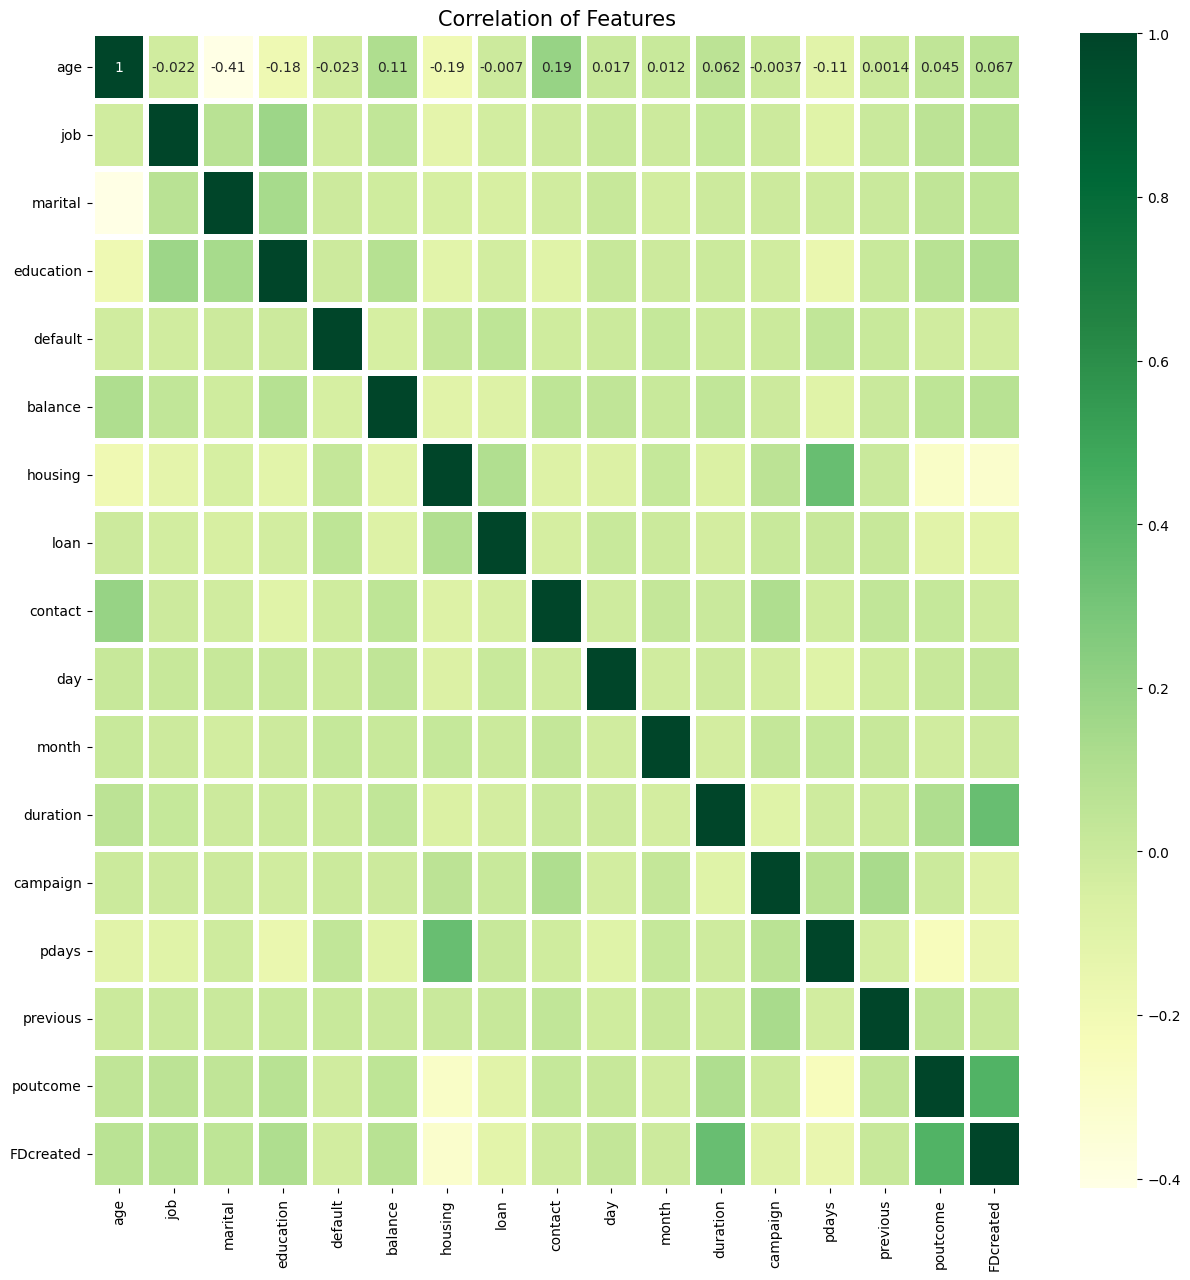

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the plot size by specifying figsize
fig, ax = plt.subplots(figsize=(15, 15))

# Create a heatmap
sns.heatmap(df.corr(),ax=ax, annot=True,linewidth=3 ,cmap="YlGn")

#plot title
plt.title("Correlation of Features", size=15, y=1)

# Show the plot
plt.show()

In [29]:
#Sorting correlation values in descending order by FDcreated attribute
df.corr()["FDcreated"].sort_values(ascending=False)

FDcreated    1.000000
poutcome     0.417918
duration     0.346718
education    0.108096
job          0.075720
balance      0.073455
age          0.067329
marital      0.046960
day          0.031903
previous     0.013334
month       -0.009099
contact     -0.010753
default     -0.029316
campaign    -0.091611
loan        -0.114855
pdays       -0.150250
housing     -0.311976
Name: FDcreated, dtype: float64

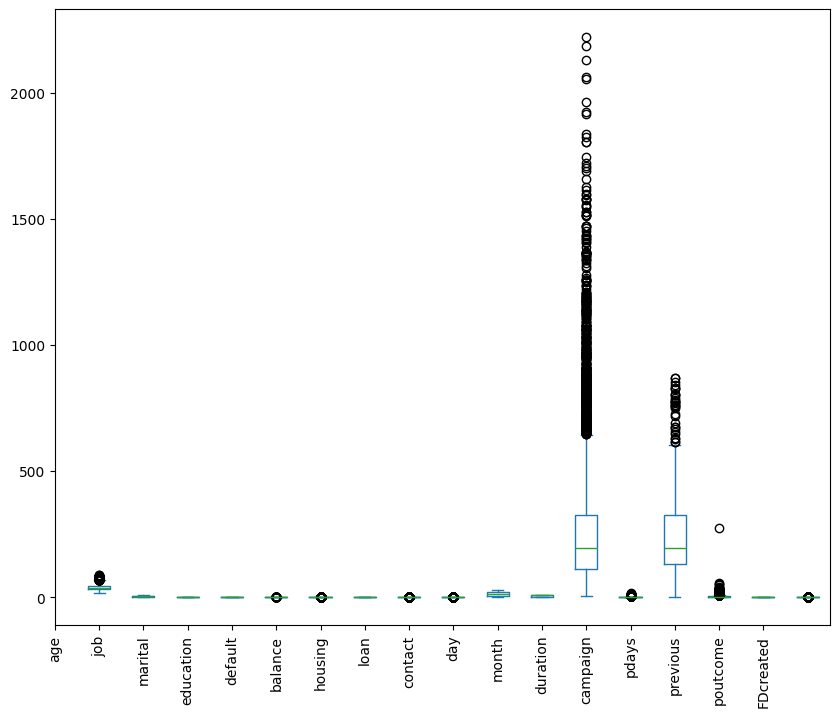

In [30]:
#Find outliers

fig, ax = plt.subplots(figsize=(10, 8))

# Create a box plot
df.plot.box(ax=ax)

# Set axis labels and ticks
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')

# Show the plot
plt.show()

In [31]:
#Drop unwanted columns
df.drop(columns=['contact','day', 'month','loan', 'pdays', 'campaign', 'housing', 'default','previous'], axis = 'columns', inplace=True)

df

,age,job,marital,education,balance,duration,poutcome,FDcreated
0,33,0,1,2,0.033290,39,0,0
1,42,0,2,1,0.019702,519,1,1
2,33,7,1,1,0.064125,144,0,1
3,36,4,1,2,0.051740,73,1,0
4,36,4,1,2,0.022675,140,0,1
...,...,...,...,...,...,...,...,...
8601,32,9,2,1,0.026394,346,0,0
8602,42,1,2,1,0.035673,951,0,1
8603,38,1,1,1,0.037177,45,0,0
8604,28,1,1,1,0.036359,129,1,0


# Data Visualization

(1)Plot of the Created FD Account or not - Count

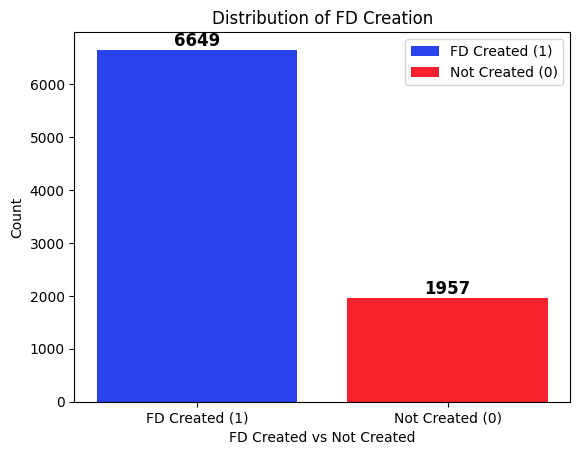

In [32]:
# Import Libraries
import matplotlib.pyplot as plt

# Count the occurrences of 1s and 0s in the 'FDcreated' column
fd_counts = df['FDcreated'].value_counts()

# Define custom colors for the bars
colors = ['#2843ed', '#f5222d']

# Create a bar plot with custom colors and labels
plt.bar(['FD Created (1)', 'Not Created (0)'], fd_counts.values, color=colors, label=['FD Created (1)', 'Not Created (0)'])

# Add labels to the bars
for i, count in enumerate(fd_counts):
    plt.text(i, count, f'{count}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.xlabel('FD Created vs Not Created')
plt.ylabel('Count')
plt.title('Distribution of FD Creation')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()


(2)Compare the ages of customers who took fixed deposit and who didn’t

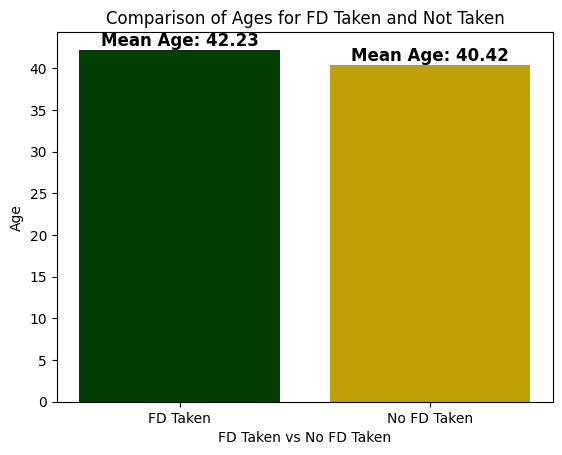

In [33]:
# import Libraries
import matplotlib.pyplot as plt

# Split the data into two groups: customers who took FD and those who didn't
fd_yes = df[df['FDcreated'] == 1]['age']
fd_no = df[df['FDcreated'] == 0]['age']

# Create a bar plot
plt.bar(['FD Taken', 'No FD Taken'], [fd_yes.mean(), fd_no.mean()], color=['#023d02', '#bfa006'])

# Add labels to the bars
plt.text(0, fd_yes.mean(), f'Mean Age: {fd_yes.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.text(1, fd_no.mean(), f'Mean Age: {fd_no.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.xlabel('FD Taken vs No FD Taken')
plt.ylabel('Age')
plt.title('Comparison of Ages for FD Taken and Not Taken')

# Show the plot
plt.show()


(3)Compare the duration of customers who took fixed deposit and who didn’t

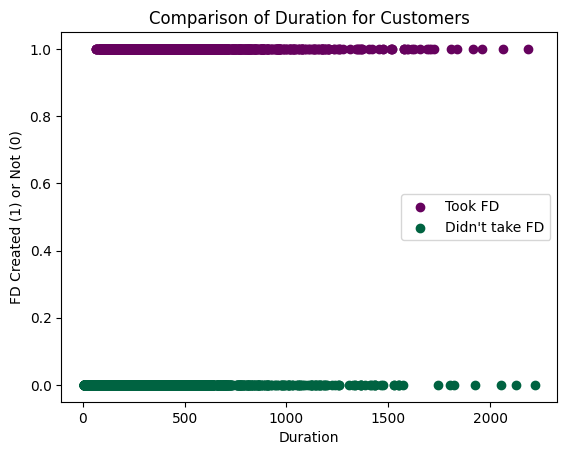

In [34]:
# imported Libraries
import matplotlib.pyplot as plt

# Assuming "df" is your DataFrame
df_yes_fd = df[df['FDcreated'] == 1]  # Selecting rows where FD was created
df_no_fd = df[df['FDcreated'] == 0]   # Selecting rows where FD was not created

# Scatter plot for customers who took fixed deposit
plt.scatter(df_yes_fd['duration'], df_yes_fd['FDcreated'], color='#66025e', label='Took FD')

# Scatter plot for customers who didn't take fixed deposit
plt.scatter(df_no_fd['duration'], df_no_fd['FDcreated'], color='#006341', label="Didn't take FD")

# Set labels and title
plt.xlabel('Duration')
plt.ylabel('FD Created (1) or Not (0)')
plt.title('Comparison of Duration for Customers')

# Add a legend
plt.legend()

# Show the plot
plt.show()

(4) Compare marital status column with FDcreated column

In [35]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#graphs = ['marital']

#Create a dictionary to map the marital status values to their string names
#marital_status_map = {1: 'Married', 2: 'Single', 0: 'Divorced'}

#Create a copy of the DataFrame
#df_copy = df.copy()

#Replace the marital status values in the copy of the DataFrame
#df_copy['marital'].replace(marital_status_map, inplace=True)

# Count the occurrences of 1s and 0s in the 'FDcreated' column
#y = df_copy['FDcreated']
#y = y.values

#for i in graphs:
#  sns.countplot(x=i, hue=y, data=df_copy, palette=sns.color_palette('Reds'))
#  plt.show()

(5) Plot a pie chart to show the fractions of FD created customers who recieved calls in different months 

In [36]:
import matplotlib.pyplot as plt

# Define a mapping dictionary from month numbers to month names
#month_mapping = {
    #1: 'jan', 
    #2: 'feb', 
    #3: 'mar', 
    #4: 'apr', 
    #5: 'may', 
    #6: 'jun', 
    #7: 'jul', 
    #8: 'aug', 
    #9: 'sept', 
    #10: 'oct', 
    #11: 'nov', 
    #12: 'dec'
#}

# Group the data by 'month' and count the number of customers recieved calls for each month
#month_counts = df[df['FDcreated'] == 1]['month'].map(month_mapping).value_counts()

# Create a pie chart
#plt.figure(figsize=(10, 6))
#plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(month_counts))))

# Add a title
#plt.title('Distribution of FD created Customers who recieved calls in each month')

# Display the pie chart
#plt.show()

(6) Compare the Age classes of the customers who subscribed for Fixed Deposits

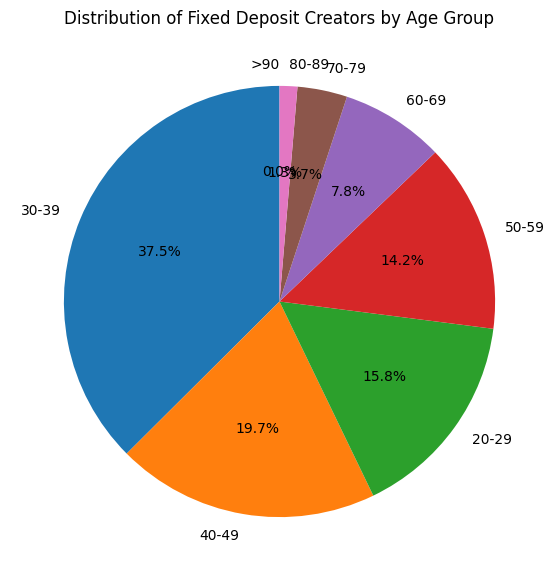

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to consider only those who created fixed deposits (FDcreated == 1)
created_deposits = df[df['FDcreated'] == 1]

# Define age groups (you can customize these as needed)
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '>90']

# Group the data by age groups and count the occurrences
age_groups = pd.cut(created_deposits['age'], bins=bins, labels=labels, right=False)
age_group_counts = age_groups.value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))  # Set the figure size
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fixed Deposit Creators by Age Group')

# Show the plot
plt.show()

# Model Training

In [38]:
#divide dataset into independent and dependent variables
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values 

In [39]:
#save dataset in new csv file
df.to_csv('df.csv', index=False)

In [40]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Decision Tree classifier

In [41]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [42]:
# Assuming X_train and y_train are your training data
# and X_test and y_test are your test data

# Create a decision tree classifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [43]:
# Fit the decision tree classifier to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [44]:
# Make predictions on the test data
y_pred = dt.predict(X_test)

In [45]:
# Evaluate the predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

Confusion Matrix:

[[1506  150]
 [ 177  319]]


Heap Map:



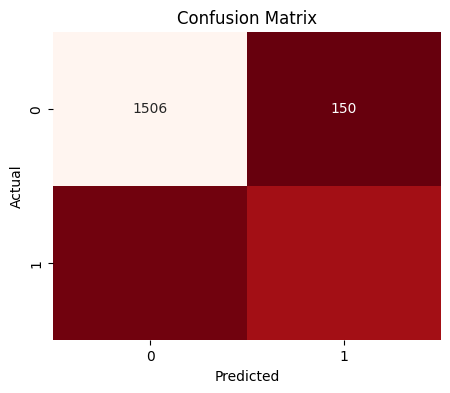

In [46]:
# Create a heapmap
print("Heap Map:\n")

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

In [47]:
# Create classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1656
           1       0.68      0.64      0.66       496

    accuracy                           0.85      2152
   macro avg       0.79      0.78      0.78      2152
weighted avg       0.85      0.85      0.85      2152



In [48]:
# Calculate training error
dt_train_pred = dt.predict(X_train)
mse_train = mean_squared_error(y_train, dt_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
dt_test_pred = dt.predict(X_test)
mse_test = mean_squared_error(y_test, dt_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of Decision Tree Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of Decision Tree Model:", mse_test)

print()

print("Accuracy of Training and Testing data:\n")
print("Training Accuracy of Decision Tree Model Classifier:", train_accuracy)
print("Testing Accuracy of Decision Tree Model Classifier:", test_accuracy)

print()
print()

Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of Decision Tree Model: 0.15959095134800125
Mean Squared Error (MSE) on Testing Set of Decision Tree Model: 0.15195167286245354

Accuracy of Training and Testing data:

Training Accuracy of Decision Tree Model Classifier: 0.8404090486519987
Testing Accuracy of Decision Tree Model Classifier: 0.8480483271375465




Plot of Training and Testing Accuracy:


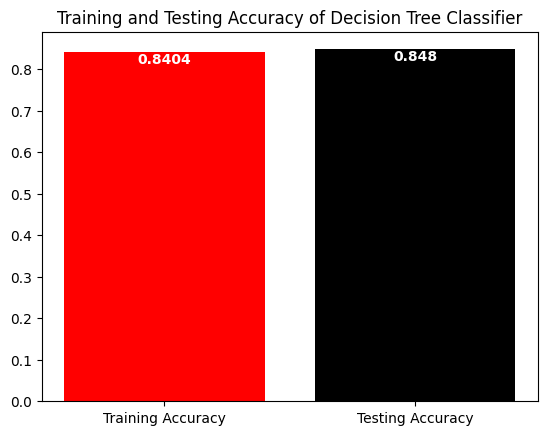

In [49]:
# Plotting training and testing accuracy
print("Plot of Training and Testing Accuracy:")

labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['red', 'black'])

# # Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of Decision Tree Classifier')
plt.show()


In [50]:
# # Create a pickle file for the model
dt_model_pickle = open('decision_tree_model.pkl', 'wb')
pickle.dump(dt, dt_model_pickle)
dt_model_pickle.close()

KNeighbors Classifier

In [51]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [52]:
# Assuming X_train and y_train are your training data
# and X_test and y_test are your test data

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [53]:
# Fit the KNN classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

In [55]:
# Evaluate the predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

Confusion Matrix:

[[1494  162]
 [ 338  158]]


In [56]:
# Evaluate the predictions
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
print("Heap Map:\n")

Heap Map:



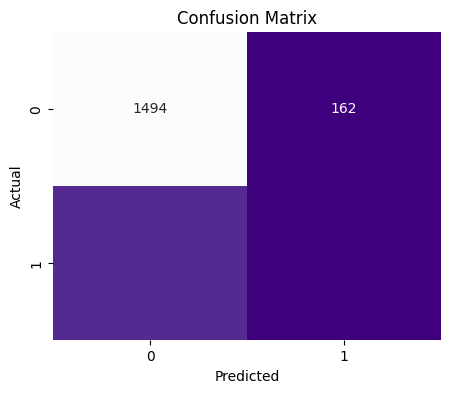

In [57]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print()
print()

In [58]:
# Create classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1656
           1       0.49      0.32      0.39       496

    accuracy                           0.77      2152
   macro avg       0.65      0.61      0.62      2152
weighted avg       0.74      0.77      0.75      2152



In [59]:
# Calculate training error
knn_train_pred = knn.predict(X_train)
mse_train = mean_squared_error(y_train, knn_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
knn_test_pred = knn.predict(X_test)
mse_test = mean_squared_error(y_test, knn_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of KNeighborsClassifier Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of KNeighborsClassifier Model:", mse_test)

print()

print("Accuracy of Training and Testing data:\n")
print("Training Accuracy of KNeighborsClassifier Classifier:", train_accuracy)
print("Testing Accuracy of KNeighborsClassifier Classifier:", test_accuracy)

print()
print()

Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of KNeighborsClassifier Model: 0.15990083669042454
Mean Squared Error (MSE) on Testing Set of KNeighborsClassifier Model: 0.23234200743494424

Accuracy of Training and Testing data:

Training Accuracy of KNeighborsClassifier Classifier: 0.8400991633095755
Testing Accuracy of KNeighborsClassifier Classifier: 0.7676579925650557




Plot of Training and Testing Accuracy:


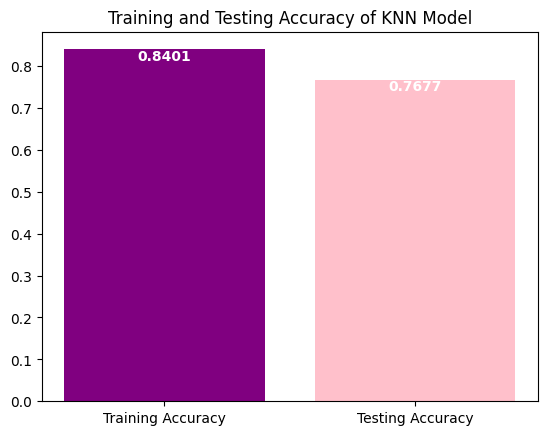

In [60]:
# Plotting training and testing accuracy
print("Plot of Training and Testing Accuracy:")

labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['purple', 'pink'])

# # Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of KNN Model')
plt.show()


In [61]:
# # Create a pickle file for the model
knn_model_pickle = open('knn_model.pkl', 'wb')
pickle.dump(knn, knn_model_pickle)
knn_model_pickle.close()

Linear Regression Model

In [62]:
# Import Libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

In [63]:
# Assuming y_train and y_test are your target variables for regression
threshold = 0.5

In [64]:
# Convert regression to classification
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

In [65]:
# Create the LinearRegression model
reg = LinearRegression()

In [66]:
# Train the model
reg.fit(X_train, y_train)

LinearRegression()

In [67]:
# Make predictions on the test set
reg_pred = reg.predict(X_test)

In [68]:
# Convert regression predictions to classification
reg_pred_class = np.where(reg_pred > threshold, 1, 0)

In [69]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, reg_pred_class)

print("Confusion Matrix:\n")
print(conf_matrix)

Confusion Matrix:

[[1560   96]
 [ 263  233]]


Heap Map:



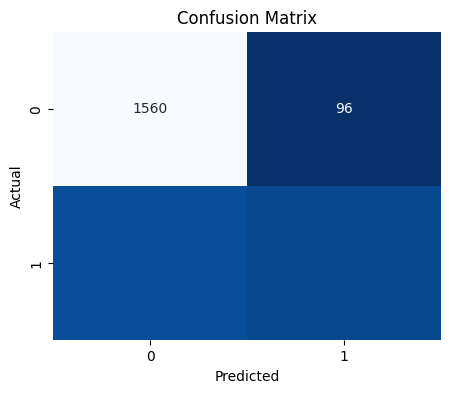

In [70]:
# Create a heatmap
print("Heap Map:\n")

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [71]:
# Create clasification Report
classification_rep = classification_report(y_test_class, reg_pred_class)

print("Clasification Report:\n")
print(classification_rep)

Clasification Report:

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1656
           1       0.71      0.47      0.56       496

    accuracy                           0.83      2152
   macro avg       0.78      0.71      0.73      2152
weighted avg       0.82      0.83      0.82      2152



In [72]:
# Evaluate the model for regression (using Mean Squared Error)
mse = mean_squared_error(y_test, reg_pred)

# Compute training accuracy and error
reg_train_pred = reg.predict(X_train)
mse_train = mean_squared_error(y_train, reg_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing accuracy
lr_acc = 1 - mse


# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of Linear Regression Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of Linear Regression Model:", mse)

print()

print("Accuracy of Training and Testing data:\n")
print("Training Accuracy of Linear Regression Model Classifier:", train_accuracy)
print("Testing Accuracy of Linear Regression Model Classifier:", lr_acc)

print()
print()

Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of Linear Regression Model: 0.127522267723665
Mean Squared Error (MSE) on Testing Set of Linear Regression Model: 0.12461868597238716

Accuracy of Training and Testing data:

Training Accuracy of Linear Regression Model Classifier: 0.872477732276335
Testing Accuracy of Linear Regression Model Classifier: 0.8753813140276129




Plot of Training and Testing Accuracy:


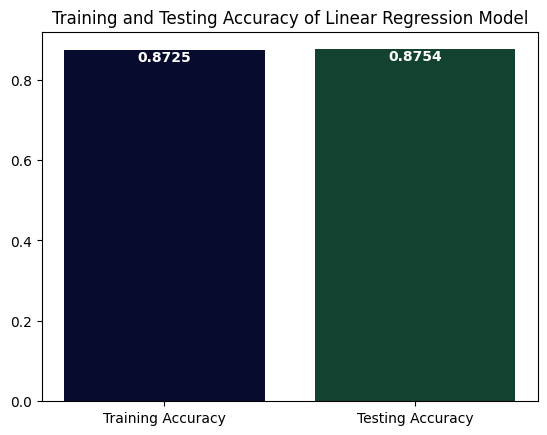

In [73]:
print("Plot of Training and Testing Accuracy:")


# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, lr_acc]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['#070b2e', '#13422f'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of Linear Regression Model')
plt.show()


In [74]:
# Create a pickle file for the model
linear_regression_pickle = open('linear_regression_model.pkl', 'wb')
pickle.dump(reg, linear_regression_pickle)
linear_regression_pickle.close()

Support Vector Machine

In [75]:
# Import Libraries
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [76]:
# Assuming y_train and y_test are your target variables for regression
threshold = 0.5 

In [77]:
# Convert regression to classification
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

In [78]:
# Create the SVM model
svm = SVC()

In [79]:
# Train the model
svm.fit(X_train, y_train_class)

SVC()

In [80]:
# Make predictions on the test set
svm_pred_class = svm.predict(X_test)

In [81]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, svm_pred_class)

print("Confusion Matrix:\n")
print(conf_matrix)

Confusion Matrix:

[[1597   59]
 [ 411   85]]


Heap Map:



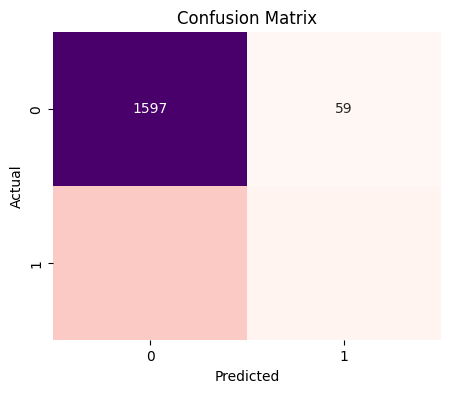

In [82]:
# Create a heatmap
print("Heap Map:\n")

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdPu', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [83]:
# Create classification Report

print("Clasification Report:\n")
classification_rep = classification_report(y_test_class, svm_pred_class)

print(classification_rep)

Clasification Report:

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1656
           1       0.59      0.17      0.27       496

    accuracy                           0.78      2152
   macro avg       0.69      0.57      0.57      2152
weighted avg       0.75      0.78      0.73      2152



In [84]:
# Calculate training error
svm_train_pred = svm.predict(X_train)
mse_train = mean_squared_error(y_train_class, svm_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
svm_test_pred = svm.predict(X_test)
mse_test = mean_squared_error(y_test_class, svm_test_pred)
test_accuracy = 1 - mse_test

print("Error of Training and Testing data:\n")
print("Training Error of SVM Model:", mse_train)
print("Testing Error of SVM Model:", mse_test)

print()

print("Accuracy of Training and Testing data:\n")
print("Training Accuracy of SVM Model:", train_accuracy)
print("Testing Accuracy of SVM Model:", test_accuracy)

Error of Training and Testing data:

Training Error of SVM Model: 0.21738456770994732
Testing Error of SVM Model: 0.2184014869888476

Accuracy of Training and Testing data:

Training Accuracy of SVM Model: 0.7826154322900527
Testing Accuracy of SVM Model: 0.7815985130111525


Plot of Training and Testing Accuracy:


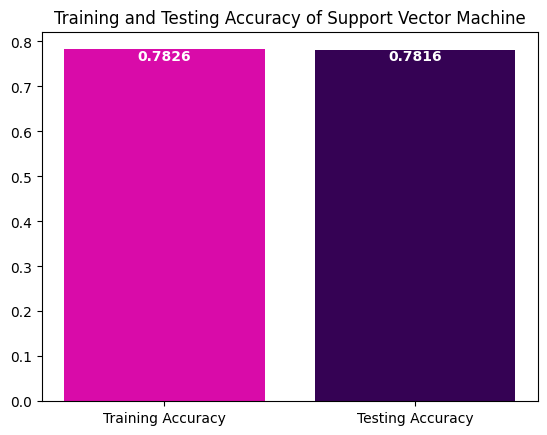

In [85]:
print("Plot of Training and Testing Accuracy:")

# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['#d90ba9', '#350254'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of Support Vector Machine')
plt.show()

In [86]:
# Create a pickle file for the model
svm_model_pickle = open('svm_model.pkl', 'wb')
pickle.dump(svm, svm_model_pickle)
svm_model_pickle.close()

Random Forest Classifier

In [87]:
#import the libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [88]:
# Assuming X_train and y_train are your training data and X_test and y_test are your test data

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')

In [89]:
# Fit the random forest classifier to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [90]:
# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the predictions
conf_matrix = confusion_matrix(y_test, y_pred)

In [91]:
# Evaluate the predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

Confusion Matrix:

[[1568   88]
 [ 183  313]]


Heap Map:



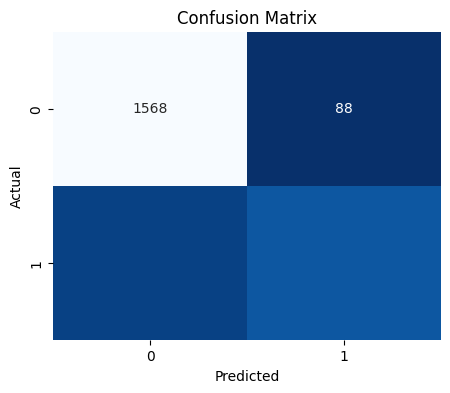

In [92]:
# Create a heatmap
print("Heap Map:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

In [93]:
# Create classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1656
           1       0.78      0.63      0.70       496

    accuracy                           0.87      2152
   macro avg       0.84      0.79      0.81      2152
weighted avg       0.87      0.87      0.87      2152



In [94]:
# Calculate training error
rf_train_pred = rf.predict(X_train)
mse_train = mean_squared_error(y_train, rf_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
rf_test_pred = rf.predict(X_test)
mse_test = mean_squared_error(y_test, rf_test_pred)
test_accuracy = 1 - mse_test

print("Mean Squared Error of the Training and Testing set:\n")
print("Training Error of Random Forest Model:", mse_train)
print("Testing Error of Random Forest Model:", mse_test)

print()

print("Accuracy of the Training and Testing set:\n")
print("Training Accuracy of Random Forest Model:", train_accuracy)
print("Testing Accuracy of Random Forest Model:", test_accuracy)

Mean Squared Error of the Training and Testing set:

Training Error of Random Forest Model: 0.0
Testing Error of Random Forest Model: 0.12592936802973978

Accuracy of the Training and Testing set:

Training Accuracy of Random Forest Model: 1.0
Testing Accuracy of Random Forest Model: 0.8740706319702602


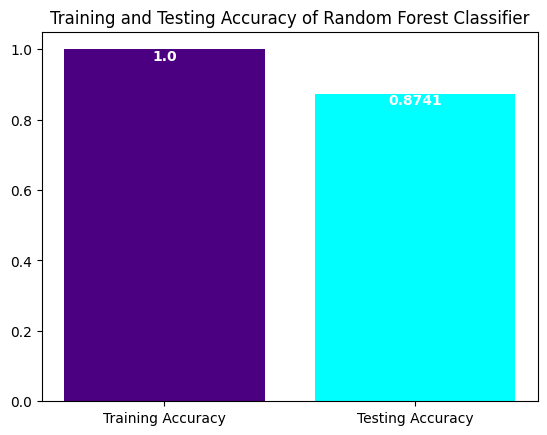

In [95]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['indigo', 'aqua'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of Random Forest Classifier')
plt.show()

In [96]:
# Create a pickle file for the model
rf_model_pickle = open('random_forest_model.pkl', 'wb')
pickle.dump(rf, rf_model_pickle)
rf_model_pickle.close()

Gaussian Naive Bayes Classifier

In [97]:
# import the libraries
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [98]:
# Assuming X_train and y_train are your training data and X_test and y_test are your test data

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

In [99]:
# Fit the Gaussian Naive Bayes classifier to the training data
gnb.fit(X_train, y_train)

GaussianNB()

In [100]:
# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate the predictions
conf_matrix = confusion_matrix(y_test, y_pred)

In [101]:
# Evaluate the predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

Confusion Matrix:

[[1493  163]
 [ 213  283]]


Heap Map:



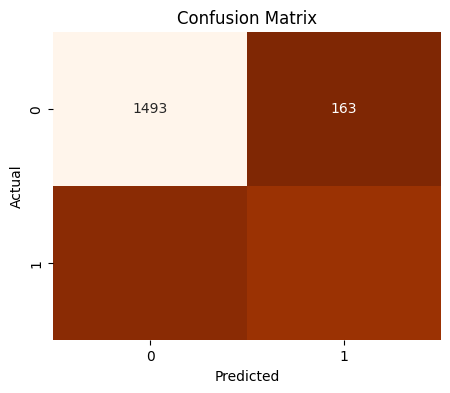

In [102]:
# Create a heatmap
print("Heap Map:\n")

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print()
print()

In [103]:
# Create classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1656
           1       0.63      0.57      0.60       496

    accuracy                           0.83      2152
   macro avg       0.75      0.74      0.74      2152
weighted avg       0.82      0.83      0.82      2152



In [104]:
# Calculate training error
gnb_train_pred = gnb.predict(X_train)
mse_train = mean_squared_error(y_train, gnb_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
gnb_test_pred = gnb.predict(X_test)
mse_test = mean_squared_error(y_test, gnb_test_pred)
test_accuracy = 1 - mse_test

print("Mean Squared Error of the Training and the Testing Set: \n")
print("Training Error of Gaussian Naive Bayes Model:", mse_train)
print("Testing Error of Gaussian Naive Bayes Model:", mse_test)

print()

print("Accuracy for the Training and the Testing Set: \n")
print("Training Accuracy of Gaussian Naive Bayes Model:", train_accuracy)
print("Testing Accuracy of Gaussian Naive Bayes Model:", test_accuracy)

Mean Squared Error of the Training and the Testing Set: 

Training Error of Gaussian Naive Bayes Model: 0.1831422373721723
Testing Error of Gaussian Naive Bayes Model: 0.17472118959107807

Accuracy for the Training and the Testing Set: 

Training Accuracy of Gaussian Naive Bayes Model: 0.8168577626278277
Testing Accuracy of Gaussian Naive Bayes Model: 0.8252788104089219


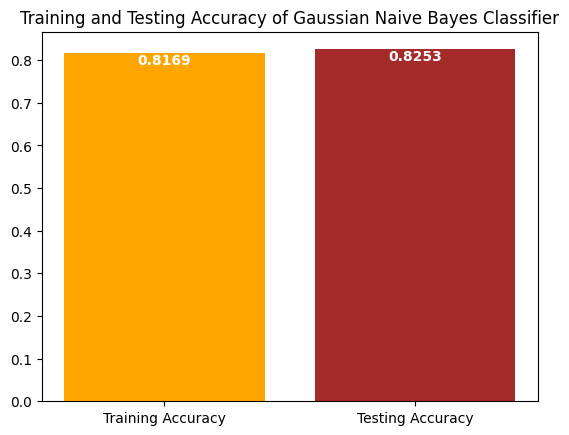

In [105]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['orange', 'brown'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of Gaussian Naive Bayes Classifier')
plt.show()

In [106]:
# Create a pickle file for the model
gnb_model_pickle = open('gaussian_naive_bayes_model.pkl', 'wb')
pickle.dump(gnb, gnb_model_pickle)
gnb_model_pickle.close()

Logistic Regression Model

In [107]:
# import the libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [108]:
# Assuming y_train and y_test are your target variables for regression
threshold = 0.5 

# Convert regression to classification
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

# Create the Logistic Regression model
log_reg = LogisticRegression()

In [109]:
# Train the model
log_reg.fit(X_train, y_train_class)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
# Make predictions on the test set
log_reg_pred_class = log_reg.predict(X_test)

In [111]:
# Evaluate the predictions
conf_matrix = confusion_matrix(y_test_class, log_reg_pred_class)
print("Confusion Matrix:\n")
print(conf_matrix)

Confusion Matrix:

[[1547  109]
 [ 248  248]]


Heap Map:



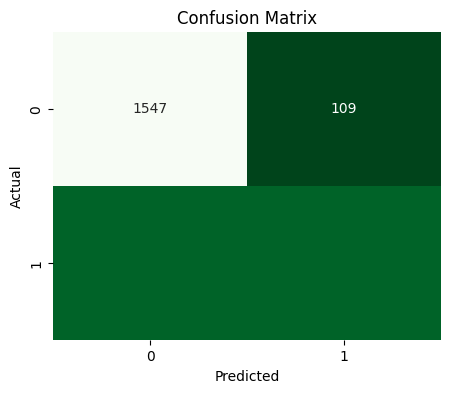

In [112]:
# Create a heatmap
print("Heap Map:\n")

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print()
print()

In [113]:
# Create classification Report
classification_rep = classification_report(y_test_class, log_reg_pred_class)

print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1656
           1       0.69      0.50      0.58       496

    accuracy                           0.83      2152
   macro avg       0.78      0.72      0.74      2152
weighted avg       0.82      0.83      0.82      2152



In [114]:
# Calculate training error
log_reg_train_pred = log_reg.predict(X_train)
mse_train = mean_squared_error(y_train_class, log_reg_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
log_reg_test_pred = log_reg.predict(X_test)
mse_test = mean_squared_error(y_test_class, log_reg_test_pred)
test_accuracy = 1 - mse_test

print("Mean Squared Error of the Training and Testing Set:\n")
print("Training Error of Logistic Regression Model:", mse_train)
print("Testing Error of Logistic Regression Model:", mse_test)

print()

print("Accuracy of the Training and Testing Set:\n")
print("Training Accuracy of Logistic Regression Model:", train_accuracy)
print("Testing Accuracy of Logistic Regression Model:", test_accuracy)

Mean Squared Error of the Training and Testing Set:

Training Error of Logistic Regression Model: 0.1732259064146266
Testing Error of Logistic Regression Model: 0.16589219330855018

Accuracy of the Training and Testing Set:

Training Accuracy of Logistic Regression Model: 0.8267740935853733
Testing Accuracy of Logistic Regression Model: 0.8341078066914498


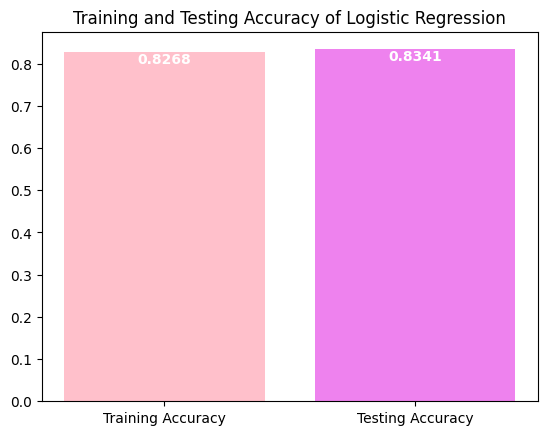

In [115]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['pink', 'violet'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of Logistic Regression')
plt.show()

In [116]:
# Create a pickle file for the model
log_reg_model_pickle = open('logistic_regression_model.pkl', 'wb')
pickle.dump(log_reg, log_reg_model_pickle)
log_reg_model_pickle.close()